In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

# Read in Data
df = pd.read_csv('all_data.csv')

df.columns = df.columns.str.lower()
df.rename(columns={"life expectancy at birth (years)": "life_expectancy"}, inplace=True)
df['gdp'] = df['gdp'].astype("int64")
df.info()

print(df.head())

print(df.country.value_counts())

years = df.year.value_counts().index.tolist()
print(years)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ KB
  country  year  life_expectancy          gdp
0   Chile  2000             77.3  77860932152
1   Chile  2001             77.3  70979923960
2   Chile  2002             77.8  69736811435
3   Chile  2003             77.9  75643459840
4   Chile  2004             78.0  99210392858
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: country, dtype: int64
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 201

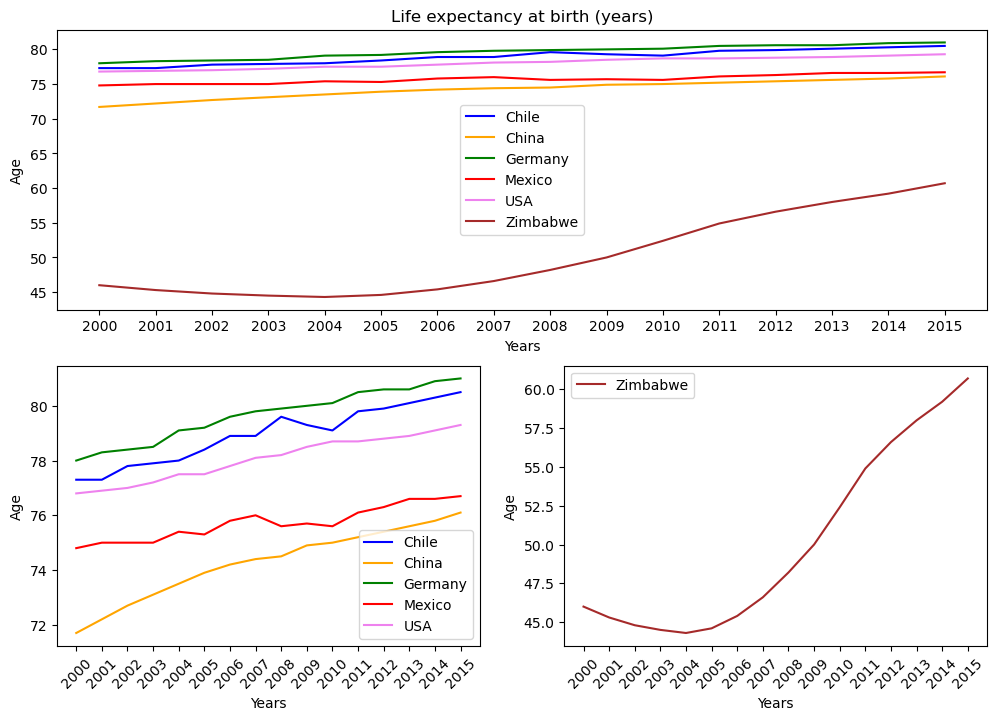

<function matplotlib.pyplot.clf()>

In [2]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot(2,1,1)
x_values = range(len(years))

plt.plot(x_values, df.life_expectancy[df.country == "Chile"], "blue", label="Chile")
plt.plot(x_values, df.life_expectancy[df.country == "China"], "orange", label="China")
plt.plot(x_values, df.life_expectancy[df.country == "Germany"], "green", label="Germany")
plt.plot(x_values, df.life_expectancy[df.country == "Mexico"], "red", label="Mexico")
plt.plot(x_values, df.life_expectancy[df.country == "United States of America"], "violet", label="USA")
plt.plot(x_values, df.life_expectancy[df.country == "Zimbabwe"], "brown", label="Zimbabwe")
plt.xlabel('Years')
plt.ylabel('Age')
ax1.set_xticks(x_values)
ax1.set_xticklabels(years)
plt.title("Life expectancy at birth (years)")
plt.legend()

ax2 = plt.subplot(2,2,3)
plt.plot(x_values, df.life_expectancy[df.country == "Chile"], "blue", label="Chile")
plt.plot(x_values, df.life_expectancy[df.country == "China"], "orange", label="China")
plt.plot(x_values, df.life_expectancy[df.country == "Germany"], "green", label="Germany")
plt.plot(x_values, df.life_expectancy[df.country == "Mexico"], "red", label="Mexico")
plt.plot(x_values, df.life_expectancy[df.country == "United States of America"], "violet", label="USA")
plt.xlabel('Years')
plt.ylabel('Age')
plt.xticks(rotation=45)
ax2.set_xticks(x_values)
ax2.set_xticklabels(years)
plt.legend()

ax3 = plt.subplot(2,2,4)
plt.plot(x_values, df.life_expectancy[df.country == "Zimbabwe"], "brown", label="Zimbabwe")
plt.xlabel('Years')
plt.ylabel('Age')
plt.xticks(rotation=45)
ax3.set_xticks(x_values)
ax3.set_xticklabels(years)
plt.legend()

plt.show()
plt.clf

In [82]:
print("Maximum life expectancy for individual countries:")
print("Germany: " + str(np.max(df.life_expectancy[df.country=="Germany"])))
print("Chile: " + str(np.max(df.life_expectancy[df.country=="Chile"])))
print("USA: " + str(np.max(df.life_expectancy[df.country=="United States of America"])))
print("Mexico: " + str(np.max(df.life_expectancy[df.country=="Mexico"])))
print("China: " + str(np.max(df.life_expectancy[df.country=="China"])))
print("Zimbabwe: " + str(np.max(df.life_expectancy[df.country=="Zimbabwe"])))
print()
print("Average life expectancy for individual countries:")
print("Germany: " + str(np.mean(df.life_expectancy[df.country=="Germany"])))
print("Chile: " + str(np.mean(df.life_expectancy[df.country=="Chile"])))
print("USA: " + str(np.mean(df.life_expectancy[df.country=="United States of America"])))
print("Mexico: " + str(np.mean(df.life_expectancy[df.country=="Mexico"])))
print("China: " + str(np.mean(df.life_expectancy[df.country=="China"])))
print("Zimbabwe: " + str(np.mean(df.life_expectancy[df.country=="Zimbabwe"])))
print()
print("Minimum life expectancy for individual countries:")
print("Germany: " + str(np.min(df.life_expectancy[df.country=="Germany"])))
print("Chile: " + str(np.min(df.life_expectancy[df.country=="Chile"])))
print("USA: " + str(np.min(df.life_expectancy[df.country=="United States of America"])))
print("Mexico: " + str(np.min(df.life_expectancy[df.country=="Mexico"])))
print("China: " + str(np.min(df.life_expectancy[df.country=="China"])))
print("Zimbabwe: " + str(np.min(df.life_expectancy[df.country=="Zimbabwe"])))
                         

Maximum life expectancy for individual countries:
Germany: 81.0
Chile: 80.5
USA: 79.3
Mexico: 76.7
China: 76.1
Zimbabwe: 60.7

Average life expectancy for individual countries:
Germany: 79.65625
Chile: 78.94375
USA: 78.0625
Mexico: 75.71875
China: 74.26249999999999
Zimbabwe: 50.09375

Minimum life expectancy for individual countries:
Germany: 78.0
Chile: 77.3
USA: 76.8
Mexico: 74.8
China: 71.7
Zimbabwe: 44.3


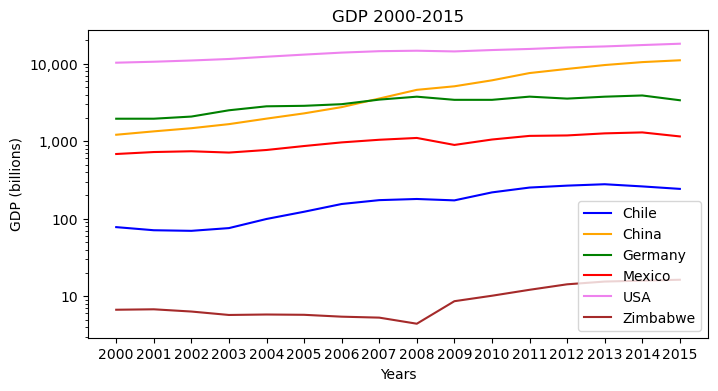

<function matplotlib.pyplot.clf()>

In [9]:
plt.figure(figsize=(8,4))

ax = plt.subplot()
x_values = range(len(years))

plt.plot(x_values, df.gdp[df.country == "Chile"], "blue", label="Chile")
plt.plot(x_values, df.gdp[df.country == "China"], "orange", label="China")
plt.plot(x_values, df.gdp[df.country == "Germany"], "green", label="Germany")
plt.plot(x_values, df.gdp[df.country == "Mexico"], "red", label="Mexico")
plt.plot(x_values, df.gdp[df.country == "United States of America"], "violet", label="USA")
plt.plot(x_values, df.gdp[df.country == "Zimbabwe"], "brown", label="Zimbabwe")
plt.xlabel('Years')
plt.ylabel('GDP (billions)')

ax.set_yscale("log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

ax.set_xticks(x_values)
ax.set_xticklabels(years)
plt.title("GDP 2000-2015")
plt.legend()

# ax2 = plt.subplot(2,2,3)

# plt.plot(x_values, df.gdp[df.country == "Chile"], "blue", label="Chile")
# plt.plot(x_values, df.gdp[df.country == "Mexico"], "red", label="Mexico")
# plt.plot(x_values, df.gdp[df.country == "Zimbabwe"], "brown", label="Zimbabwe")
# plt.xlabel('Years')
# plt.ylabel('GDP')
# plt.xticks(rotation=45)
# ax2.set_xticks(x_values)
# ax2.set_xticklabels(years)
# plt.legend()

# ax3 = plt.subplot(2,2,4)

# plt.plot(x_values, df.gdp[df.country == "China"], "orange", label="China")
# plt.plot(x_values, df.gdp[df.country == "Germany"], "green", label="Germany")
# plt.plot(x_values, df.gdp[df.country == "United States of America"], "violet", label="USA")
# plt.xlabel('Years')
# plt.ylabel('GDP')
# plt.xticks(rotation=45)
# ax3.set_xticks(x_values)
# ax3.set_xticklabels(years)
# plt.legend()

plt.show()
plt.clf

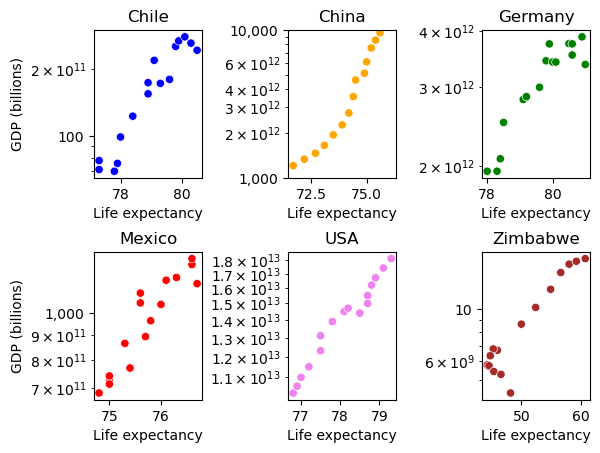

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure()

ax1 = plt.subplot(2,3,1)
sns.scatterplot(x = "life_expectancy", y = "gdp", hue="country", data = df[df.country == "Chile"], palette=["blue"])
ax1.set_yscale("log")
plt.xlabel('Life expectancy')
plt.ylabel('GDP (billions)')
plt.title("Chile")
ax1.get_legend().set_visible(False)
# plt.ylim(1000*10**9, 10000*10**9)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

ax2 = plt.subplot(2,3,2)
sns.scatterplot(x = "life_expectancy", y = "gdp", hue="country", data = df[df.country == "China"], palette=["orange"])
ax2.set_yscale("log")
plt.xlabel('Life expectancy')
ax2.set(ylabel=None)
plt.title("China")
ax2.get_legend().set_visible(False)
plt.ylim(1000*10**9, 10000*10**9)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

ax3 = plt.subplot(2,3,3)
sns.scatterplot(x = "life_expectancy", y = "gdp", hue="country", data = df[df.country == "Germany"], palette=["green"])
ax3.set_yscale("log")
plt.xlabel('Life expectancy')
ax3.set(ylabel=None)
plt.title("Germany")
ax3.get_legend().set_visible(False)
# plt.ylim(1000*10**9, 10000*10**9)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

ax4 = plt.subplot(2,3,4)
sns.scatterplot(x = "life_expectancy", y = "gdp", hue="country", data = df[df.country == "Mexico"], palette=["red"])
ax4.set_yscale("log")
plt.xlabel('Life expectancy')
plt.ylabel('GDP (billions)')
plt.title("Mexico")
ax4.get_legend().set_visible(False)
# plt.ylim(1000*10**9, 10000*10**9)
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

ax5 = plt.subplot(2,3,5)
sns.scatterplot(x = "life_expectancy", y = "gdp", hue="country", data = df[df.country == "United States of America"], palette=["violet"])
ax5.set_yscale("log")
plt.xlabel('Life expectancy')
ax5.set(ylabel=None)
plt.title("USA")
ax5.get_legend().set_visible(False)
# plt.ylim(1000*10**9, 10000*10**9)
ax5.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

ax6 = plt.subplot(2,3,6)
sns.scatterplot(x = "life_expectancy", y = "gdp", hue="country", data = df[df.country == "Zimbabwe"], palette=["brown"])
ax6.set_yscale("log")
plt.xlabel('Life expectancy')
ax6.set(ylabel=None)
plt.title("Zimbabwe")
ax6.get_legend().set_visible(False)
# plt.ylim(1000*10**9, 10000*10**9)
ax6.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/10**9)))

plt.subplots_adjust(wspace=0.80, hspace=0.50)


plt.show()
plt.clf()